# **Machine Learning II**

## Workshop II

### **Hector Mauricio Rendón López**

## **1.	Spectral Clustering**

Among the clustering algorithms are *K means* clustering, *Fuzzy analysis* clustering, *Mean shift*, *DBSCAN* and *Spectral* are clustering algorithms. The *K-means* algorithm generally assumes that clusters are spherical or round, that is, within a radius k from the centroid of the cluster. Furthermore, it requires many iterations to determine the centroid of the group. On the spectrum, groups do not follow a fixed shape or pattern. Points that are far away but connected belong to the same group and points that are less distant from each other could belong to different groups if they are not connected. This implies that the algorithm could be effective for data of different shapes and sizes.

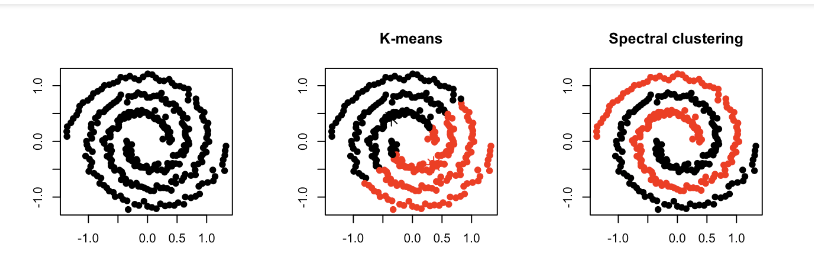

Spectral clustering is a technique originating from graph theory, the approach is used to identify communities of nodes in a graph based on the edges that connect them. The method is flexible and also allows data to be grouped without graphs. This technique is based on the eigenvalues of the similarity matrix of the data to perform a dimensionality reduction before grouping them into fewer dimensions. It consists of constructing a similarity graph, projecting data into a lower-dimensional space, and then clustering the data.


Steps:
* 1.	Form a distance matrix
* 2.	Transform the distance matrix into an affinity matrix *A* (adjacency matrix)
* 3.	Calculate the degree matrix D and the Laplacian matrix *L = D – A*.
* 4.	Find the eigenvalues and eigenvectors of *L*.
* 5.	Form a matrix with the eigenvectors of *k* largest eigenvalues calculated in the previous step.
* 6.	Normalize the vectors.
* 7.	Group data points in *k-dimensional* space


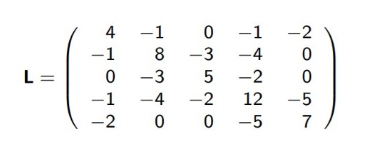

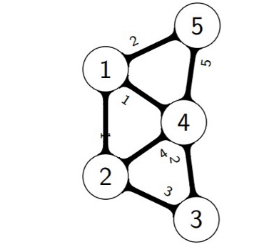


### **a.	Application**

*	To identify patterns and similarities that across different observations.
*	Image segmentation
*	Educational data mining
*	Entity resolution
*	Speech separation
*	Spectral clustering of protein sequences
*	Text image segmentation.


### **b.	Mathematical fundamentals**

Given an enumerated set of data points, the similarity matrix may be defined as a symmetric matrix *A*, where ***Aij*** >= 0 represents a measure of the similarity between data points with indices ***i*** and ***j***.

The general approach to spectral clustering is to use a standard clustering method (k-means) on relevant eigenvectors of a Laplacian matrix of ***A***. The eigenvectors that are relevant are the ones that correspond to smallest several eigenvalues of the Laplacian except for the smallest eigenvalue which will have a value of 0. For computational efficiency, these eigenvectors are often computed as the eigenvectors corresponding to the largest several eigenvalues of a function of the Laplacian. The eigenvalue problem describing transversal vibration modes of a mass-spring system is exactly the same as the eigenvalue problem for the graph Laplacian matrix defined as

***L: D - A***

Where  D is the diagonal matrix,

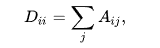

And ***A*** is the adjacency matrix.

So that the components of the eigenvectors corresponding to the smallest eigenvalues of the graph *Laplacian*.


### **c. Algorithm to compute it**

* Calculate the Laplacian ***L*** (or the normalized *Laplacian*)
* Calculate the first ***k*** eigenvectors (the eigenvectors corresponding to the ***k*** smallest eigenvalues of ***L***)
* Consider the matrix formed by the first ***k*** eigenvectors; the ***l-th*** row defines the features of graph node ***l***
* Cluster the graph nodes based on these features (e.g., using *k-means* clustering).

In [3]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

<ipython-input-3-4c229bbe3420>:7: UserWarning: DelftStack
  warnings.warn('DelftStack')


<ipython-input-4-94fbc9013d7e>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap("viridis", n_clusters))


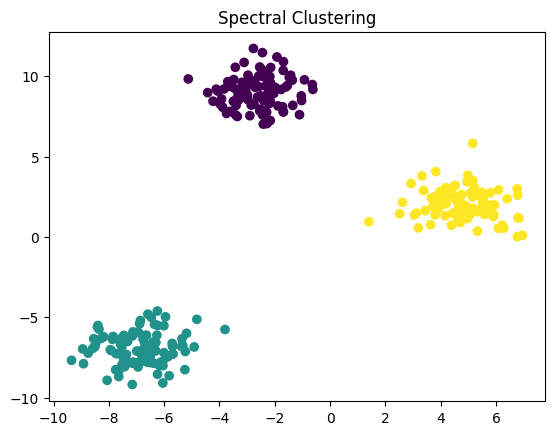

In [4]:
# Generate some sample data
n_samples = 300
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Create a similarity matrix (e.g., using radial basis function kernel)
def rbf_kernel(X, gamma=1.0):
    n = X.shape[0]
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            similarity = np.exp(-gamma * np.linalg.norm(X[i] - X[j])**2)
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity
    return similarity_matrix

gamma = 1.0
similarity_matrix = rbf_kernel(X, gamma)

# Perform spectral clustering
n_clusters = 3  # Number of clusters
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = sc.fit_predict(similarity_matrix)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap("viridis", n_clusters))
plt.title("Spectral Clustering")
plt.show()


### **d.	Relation to some of the concepts**

Clustering is one of the initial steps done in exploratory data analysis to visualize the similarity and to identify the pattern lying hidden in data points. The motive of clustering is to find the similarity within a cluster and the difference between two clusters. *K mean* clustering, *Fuzzy* analysis clustering, *Mean shift*, *DBSCAN* and *Spectral* are clustering algorithms.

## **2. DBSCAN method**

DBSCAN Density-Based Clustering Algorithms Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density. Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

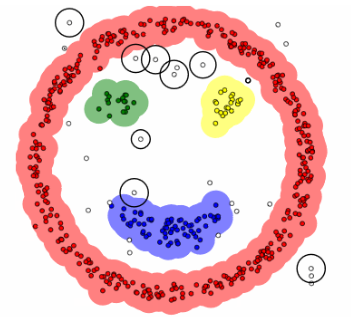

### **a.	Application**

*	To detect clusters that are oddly or irregularly shaped, such as clusters that are ring-shaped.

*	It is able to detect outliers and exclude them from the clusters entirely. That means that *DBSCAN* is very robust to outliers and great for datasets with multiple outliers.

*	It can automatically detect the number of clusters that exist in the data. This is great for cases where you do not have much intuition on how many clusters there should be.

*	Is less sensitive to initialization conditions like the order of the observations in the dataset and the seed that is used.

*	There are multiple implementations of *DBSCAN* that aim to optimize the time complexity of the algorithm. *DBSCAN* is generally slower than *k-means* clustering but faster than hierarchical clustering and spectral clustering.


### **b.	Mathematical fundamentals**

Consider a set of points in some space to be clustered. Let ε be a parameter specifying the radius of a neighborhood with respect to some point. For the purpose of DBSCAN clustering, the points are classified as core points, (directly-) reachable points and outliers, as follows:

*	A point p is a core point if at least minPts points are within distance *ε* of it (including *p*).

*	A point q is directly reachable from p if point q is within distance ε from core point p. Points are only said to be directly reachable from core points.
*	A point q is reachable from p if there is a path *p1, ..., pn* with *p1 = p* and *pn = q*, where each pi+1 is directly reachable from pi. Note that this implies that the initial point and all points on the path must be core points, with the possible exception of *q*.

*	All points not reachable from any other point are outliers or noise points.

Now if p is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point; non-core points can be part of a cluster, but they form its "edge", since they cannot be used to reach more points.


### **c.	Algorithm to compute it - Using Scikit-learn**

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

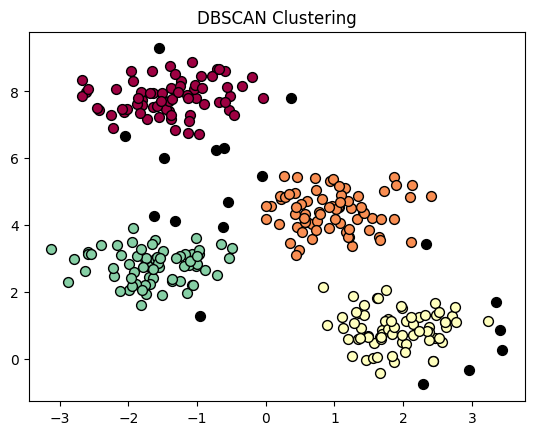

In [6]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(X)

# Get cluster labels (-1 represents noise points)
labels = dbscan.labels_

# Create a scatter plot of the data points with color-coded clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=50, edgecolor='k')

plt.title('DBSCAN Clustering')
plt.show()


## **3.	The elbow method in clustering**

The elbow method is a popular unsupervised learning algorithm used in *K-Means* clustering to determine the optimal number of clusters for a given dataset.   In the *Elbow method*, we are actually varying the number of clusters (*K*) from 1 – 10. For each value of *K*, we are calculating WCSS (Within-Cluster Sum of Square). *WCSS* is the sum of the squared distance between each point and the centroid in a cluster. When we plot the *WCSS* with the *K* value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. *WCSS* value is largest when *K = 1*. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the *X*-axis. The *K* value corresponding to this point is the optimal value of *K* or an optimal number of clusters.


The intuition behind the elbow method is that you want to find a balance between having too few clusters (underfitting) and having too many clusters (overfitting). The "elbow point" represents a good compromise where adding more clusters does not significantly reduce the WCSS, suggesting that it's a suitable number of clusters for your data.


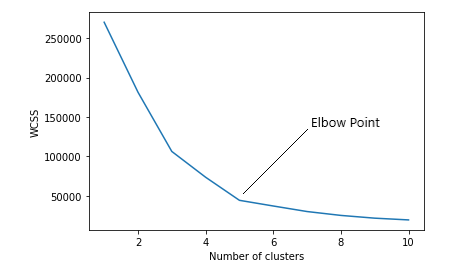

Flaws does it pose to assess quality:

*	Can be subjective determining the exact elbow point, involves visual judgment which can be imprecise.

*	Different initializations of cluster center can lead to different results, impacting the shape elbow.

*	Assumes that clusters are globular and equally sized.

*	Is primarily designed for K-means clustering, It may not be applicable or suitable for other clustering algorithms with different cost functions or cluster structures.

*	It's a heuristic approach and may not always lead to the most meaningful or interpretable clustering results.


## **4.  Python package**

### **a.  k-means**

*K-means* is a clustering algorithm based on a distance metric. Generally, the number of clusters must be specified so that the algorithm then randomly represents the prototypes or centers of each cluster. Then, a set of samples is assigned to the nearest cluster center according to a distance metric that separates them from the center. For each of the clusters, the centroid of all its samples is calculated, which is taken as the new centers of their respective clusters. The iteration continues until the assignment of the same samples to the same clusters is repeated (that is, clustering stability is achieved) or the optimization error is lower when set by the user.

*K-means* algorithm steps:

1) Choose a number of clusters that acts as the number of clusters you want to reach. He can set the optimization error of the user cost function that he wants to obtain from clustering.

2) The algorithm randomly generates a set of centroids according to the number of clusters.

3) For each sample of the data, this sample is added to a cluster that fits best.

4) The centers are calculated again, which will be the new centers of the grouping.

5) If the optimization error given by the user is not reached, return to step 3.

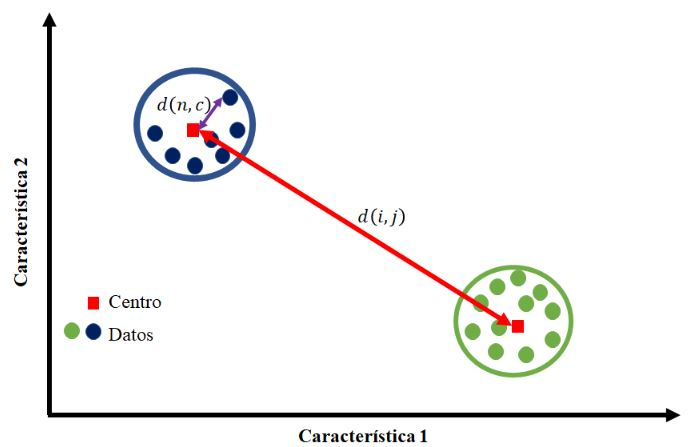

By assuming both distance measures, two fundamental concepts of data grouping are established: Compactness and Separability. Compactness (dn,c) is a measure that establishes how close or far a data set is to a center or centroid. On the other hand, separability (di,j) is a measure that establishes the separation between clusters, in such a way that if there is a greater distance between them, the data that belong to one cluster can be better differentiated from another.

### **k-means module using Python and Numpy**

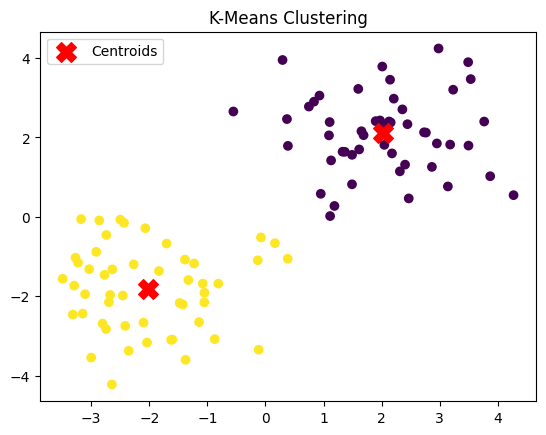

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=2, max_iters=500, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize cluster centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each point to the nearest cluster
            labels = self._assign_clusters(X)

            # Update cluster centroids
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.labels = self._assign_clusters(X)

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

def main():
    # Generate some random data points for demonstration
    np.random.seed(0)
    data = np.concatenate([np.random.randn(50, 2) + [2, 2], np.random.randn(50, 2) + [-2, -2]])

    # Initialize and fit the K-means model
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data)

    # Visualize the data points and cluster centroids
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels, cmap='viridis')
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.legend()
    plt.title('K-Means Clustering')
    plt.show()

if __name__ == "__main__":
    main()



In [8]:
class custom_KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4, random_state=None):
        """
        Initialize the KMeans clustering model

        Parameters:
        - n_clusters: int, number of clusters to form.
        - max_iter: int, maximum number of iterations.
        - tol: float, convergence threshold. If the change in centroids is smaller than tol, the algorithm stops.
        - random_state: int or None, seed for random initialization of centroids.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None

    def fit(self, X):
        """
        Fit the KMeans model to the input data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Initialize centroids randomly from the data points
        n_samples, n_features = X.shape
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[indices]

        for iter in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)

            # Update centroids by taking the mean of assigned data points
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_labels(self, X):
        """
        Assign each data point to the nearest centroid.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """
        Update centroids by taking the mean of assigned data points.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.

        Returns:
        - new_centroids: numpy array, shape (n_clusters, n_features), updated centroids.
        """
        new_centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # If no points are assigned to this centroid, keep it the same
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def predict(self, X):
        """
        Predict cluster labels for input data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def fit_predict(self, X):
        """
        Fit the KMeans model to the input data and immediately predict cluster labels.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        self.fit(X)
        return self.predict(X)

In [9]:
# Generate synthetic data with three clusters
X, y = make_blobs(n_samples=300, n_features=2, centers=5, random_state=100)

# Create a KMeans instance with 3 and 5 clusters
kmeans_k3 = custom_KMeans(n_clusters=3, random_state=42)
kmeans_k5 = custom_KMeans(n_clusters=5, random_state=42)

# Fit the model to the data and predict cluster labels
labels_k3 = kmeans_k3.fit_predict(X)
labels_k5 = kmeans_k5.fit_predict(X)

<ipython-input-10-2dcbaaee0de4>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(X[:, 0], X[:, 1], cmap='viridis')


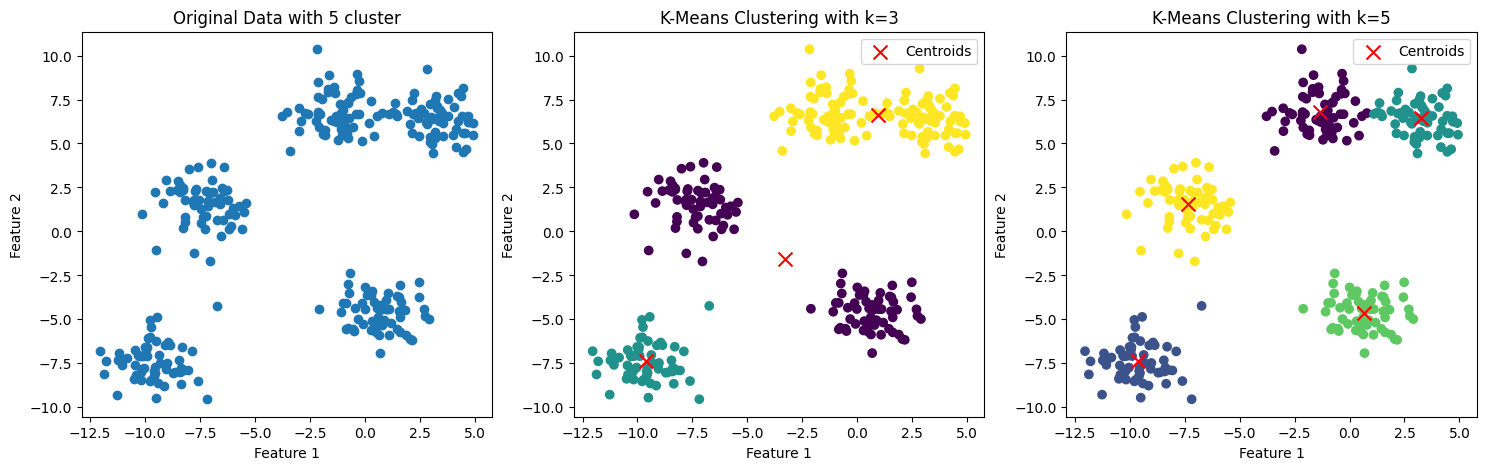

In [10]:
# Create subplots: one for the original data and one for K-Means clustering
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot the original data points
ax1.scatter(X[:, 0], X[:, 1], cmap='viridis')
ax1.set_title('Original Data with 5 cluster')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot the data points with color-coded cluster assignments
ax2.scatter(X[:, 0], X[:, 1], c=labels_k3, cmap='viridis')
ax2.scatter(kmeans_k3.centroids[:, 0], kmeans_k3.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
ax2.set_title('K-Means Clustering with k=3')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

# Plot the data points with color-coded cluster assignments
ax3.scatter(X[:, 0], X[:, 1], c=labels_k5, cmap='viridis')
ax3.scatter(kmeans_k5.centroids[:, 0], kmeans_k5.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
ax3.set_title('K-Means Clustering with k=5')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()

plt.show()

### **b. k-mediods**

*k-medoids* is a clustering algorithm related to the k-means and medoidshift algorithms.

Both *k-medoids* and k-means are algorithms that work with partitions (dividing the data set into groups) and both try to minimize the distance between points that would be added to a group and another point designated as the center of that group. In contrast to the k-means algorithm, *k-medoids* choose datapoints as centers and work with an arbitrary metric of distances between datapoints instead of using the norm *L2*

K-medoid is a classic cluster partitioning technique that divides data made up of n objects into k clusters (with k known in advance).

It is more robust to noise and isolated parts than k-means because it minimizes a sum of dissimilarities (between pairs of points) instead of a sum of squared Euclidean distances.

A medoid can be defined as the object in a group whose average dissimilarity to all objects in the group is minimal. It is the point located most towards the center in the entire group.

### **k-mediods module using Python and Numpy**

In [11]:
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import pairwise_distances_argmin_min

class custom_KMedoids:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4, random_state=None):
        """
        Initialize the KMedoids clustering model.

        Parameters:
        - n_clusters: int, number of clusters to form.
        - max_iter: int, maximum number of iterations.
        - tol: float, convergence threshold. If the change in medoids is smaller than tol, the algorithm stops.
        - random_state: int or None, seed for random initialization of medoids.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.medoids = None

    def fit(self, X):
        """
        Fit the KMedoids model to the input data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples, _ = X.shape

        # Initialize medoids randomly from the data points
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.medoids = X[indices]

        for iter in range(self.max_iter):
            # Assign each data point to the nearest medoid
            labels = self._assign_labels(X)

            # Update medoids
            new_medoids = self._update_medoids(X, labels)

            # Check for convergence
            if np.all(np.abs(new_medoids - self.medoids) < self.tol):
                break

            self.medoids = new_medoids

    def _assign_labels(self, X):
        """
        Assign each data point to the nearest medoid.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.medoids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_medoids(self, X, labels):
        """
        Update medoids by selecting the data point that minimizes the total dissimilarity within the cluster.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.

        Returns:
        - new_medoids: numpy array, shape (n_clusters, n_features), updated medoids.
        """
        new_medoids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            cluster_distances = np.sum(np.linalg.norm(cluster_points - cluster_points[:, np.newaxis], axis=2), axis=1)
            new_medoids[i] = cluster_points[np.argmin(cluster_distances)]
        return new_medoids

    def predict(self, X):
        """
        Predict cluster labels for input data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.medoids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def fit_predict(self, X):
        """
        Fit the KMedoids model to the input data and immediately predict cluster labels.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        self.fit(X)
        return self.predict(X)


In [12]:
# Create a KMedoid instance with 3 and 5 clusters
Kmedoids_k3 = custom_KMedoids(n_clusters=3, random_state=42)
Kmedoids_k5 = custom_KMedoids(n_clusters=5, random_state=42)

# Fit the model to the data and predict cluster labels
label_k3 = Kmedoids_k3.fit_predict(X)
label_k5 = Kmedoids_k5.fit_predict(X)

<ipython-input-13-0ce5ac64e167>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(X[:, 0], X[:, 1], cmap='viridis')


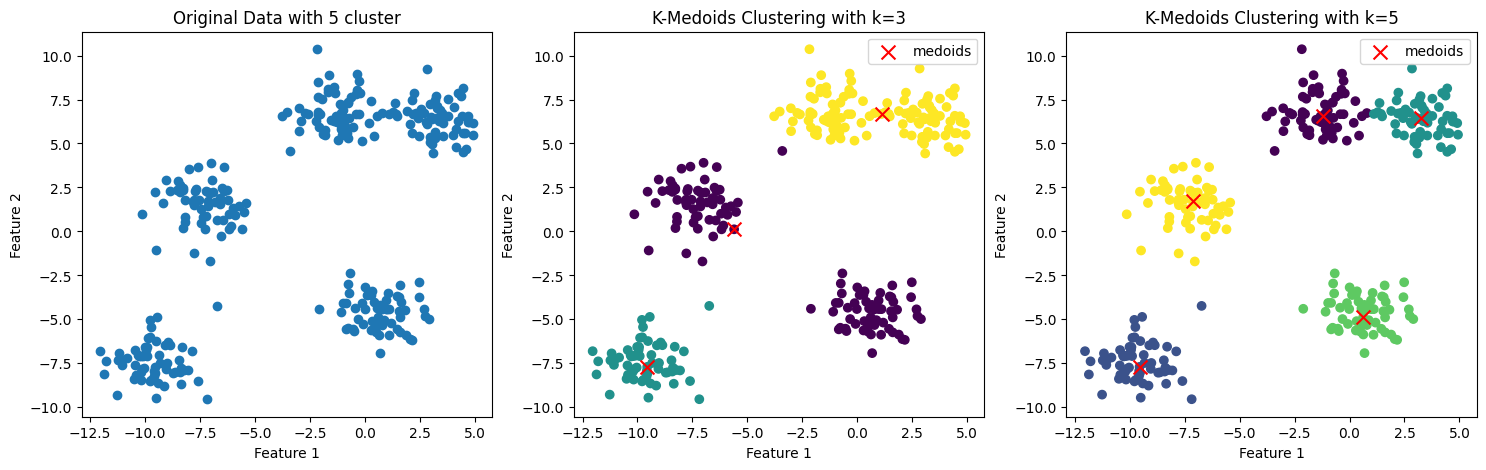

In [13]:
# Create subplots: one for the original data and one for K-Means clustering
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot the original data points
ax1.scatter(X[:, 0], X[:, 1], cmap='viridis')
ax1.set_title('Original Data with 5 cluster')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot the data points with color-coded cluster assignments
ax2.scatter(X[:, 0], X[:, 1], c=label_k3, cmap='viridis')
ax2.scatter(Kmedoids_k3.medoids[:, 0], Kmedoids_k3.medoids[:, 1], c='red', marker='x', s=100, label='medoids')
ax2.set_title('K-Medoids Clustering with k=3')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

# Plot the data points with color-coded cluster assignments
ax3.scatter(X[:, 0], X[:, 1], c=label_k5, cmap='viridis')
ax3.scatter(Kmedoids_k5.medoids[:, 0], Kmedoids_k5.medoids[:, 1], c='red', marker='x', s=100, label='medoids')
ax3.set_title('K-Medoids Clustering with k=5')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()

plt.show()

## **5. Modules in unsupervised to cluster some toy data**

### **a. Code snippet to create scattered data X**

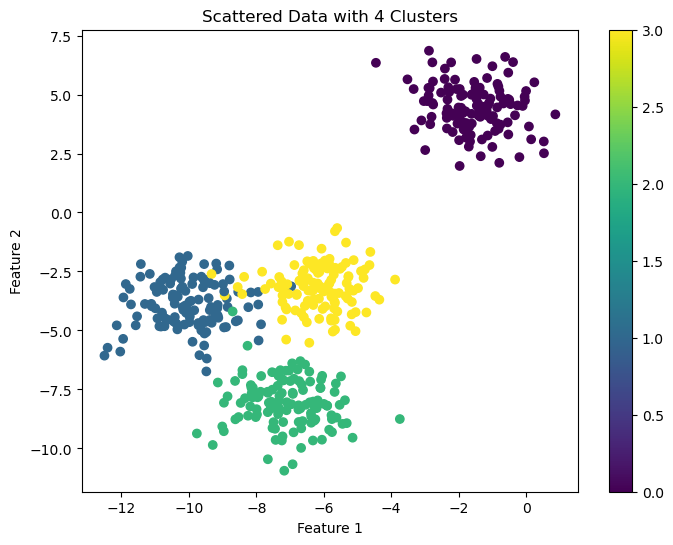

Number of clusters: 4


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create scattered data
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

# Plot the scattered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
plt.title('Scattered Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Count the number of clusters
num_clusters = len(set(y))
print(f'Number of clusters: {num_clusters}')


In [16]:
from sklearn.datasets import make_blobs

XX, yy = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

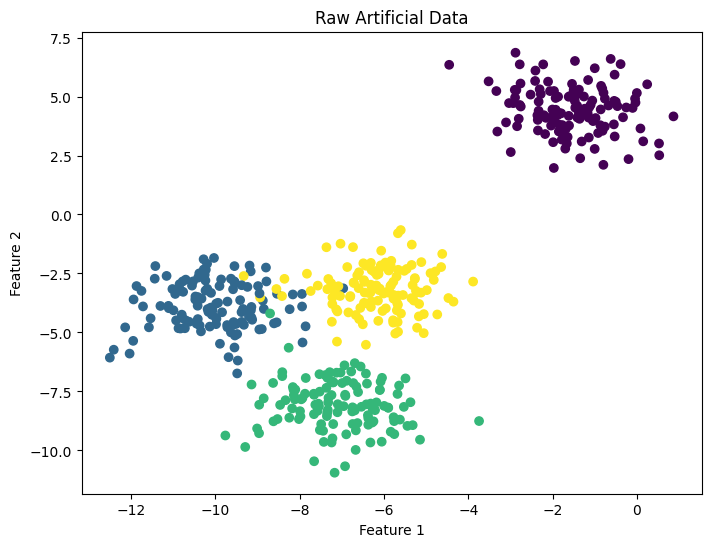

In [17]:
# Plot the raw data points
plt.figure(figsize=(8, 6))
plt.scatter(XX[:, 0], XX[:, 1], c=yy, cmap='viridis')
plt.title('Raw Artificial Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [19]:
# Iterate over different values of K (number of clusters)

from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score


k_values = [2, 3, 4, 5, 6]
silhouette_scores_kmeans = []
silhouette_scores_kmedoids = []

for k in k_values:
    # Handle the case when K=1
    if k == 1:
        silhouette_scores_kmeans.append(0)
        silhouette_scores_kmedoids.append(0)
    else:
        # Initialize K-Means and K-Medoids models
        kmeans = custom_KMeans(n_clusters=k, random_state=42)
        kmedoids = custom_KMedoids(n_clusters=k, random_state=42)

        # Fit_predict the models to the data
        labels_kmeans = kmeans.fit_predict(XX)
        labels_kmedoids = kmedoids.fit_predict(XX)

        # Calculate silhouette scores
        silhouette_score_kmeans = silhouette_score(XX, labels_kmeans)
        silhouette_score_kmedoids = silhouette_score(XX, labels_kmedoids)

        silhouette_scores_kmeans.append(silhouette_score_kmeans)
        silhouette_scores_kmedoids.append(silhouette_score_kmedoids)

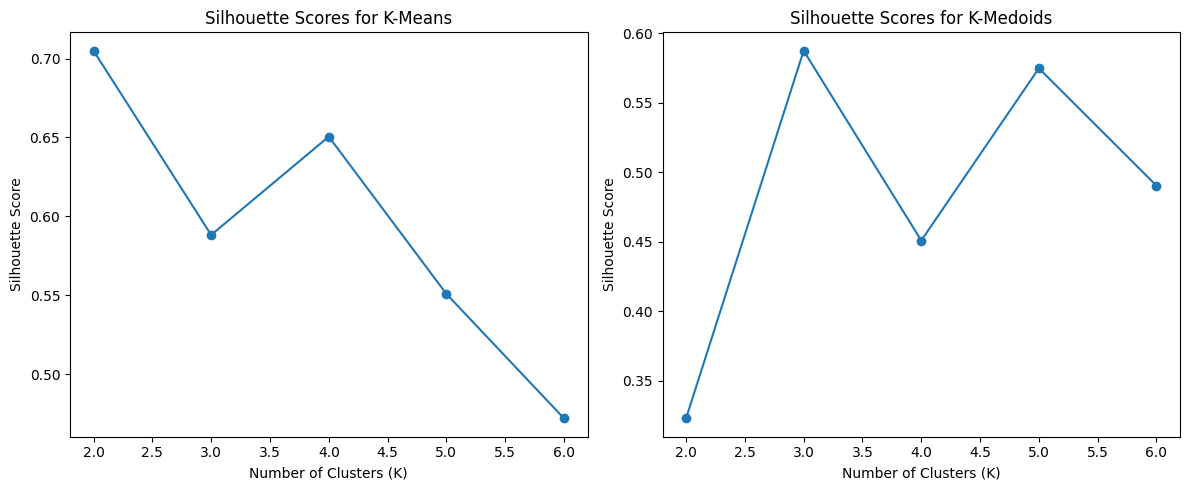

In [20]:
# Plot silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_kmedoids, marker='o')
plt.title('Silhouette Scores for K-Medoids')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

The Silhouette Method is a graphical and quantitative approach to finding the optimal number of clusters (K) for a dataset in clustering analysis. It helps you choose the number of clusters that maximizes the similarity within clusters and minimizes the similarity between clusters.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters, negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

#### Distance from each other

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean

# Calculate pairwise distances within each cluster
cluster_distances = []
for cluster_id in range(4):
    cluster_points = X[y == cluster_id]
    pairwise_distances = []
    for i in range(len(cluster_points)):
        for j in range(i + 1, len(cluster_points)):
            distance = euclidean(cluster_points[i], cluster_points[j])
            pairwise_distances.append(distance)
    cluster_distances.append(pairwise_distances)

# Calculate the average distance within each cluster
average_distances = [np.mean(distances) for distances in cluster_distances]

print("Average distance within each cluster:")
for i, avg_distance in enumerate(average_distances):
    print(f"Cluster {i}: {avg_distance}")


Average distance within each cluster:
Cluster 0: 1.7106234583137094
Cluster 1: 1.7886004620399283
Cluster 2: 1.7972021752346738
Cluster 3: 1.6412785317170073


#### The best number of clusters

The K value with the highest silhouette score for K-Means is 2, while for K-Medoids is 3. It's because the random_state value, if we use random_state = 1, the optimal K is 2 for both. To analyze it better, let's plot both K = 2 and 3

## **6. Snippet to create different types of scattered data**

In [24]:
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============

n_samples = 500

# noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# Blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# no_structure
no_structure = np.random.rand(n_samples, 2), None


### Snippet to create different types of scattered data

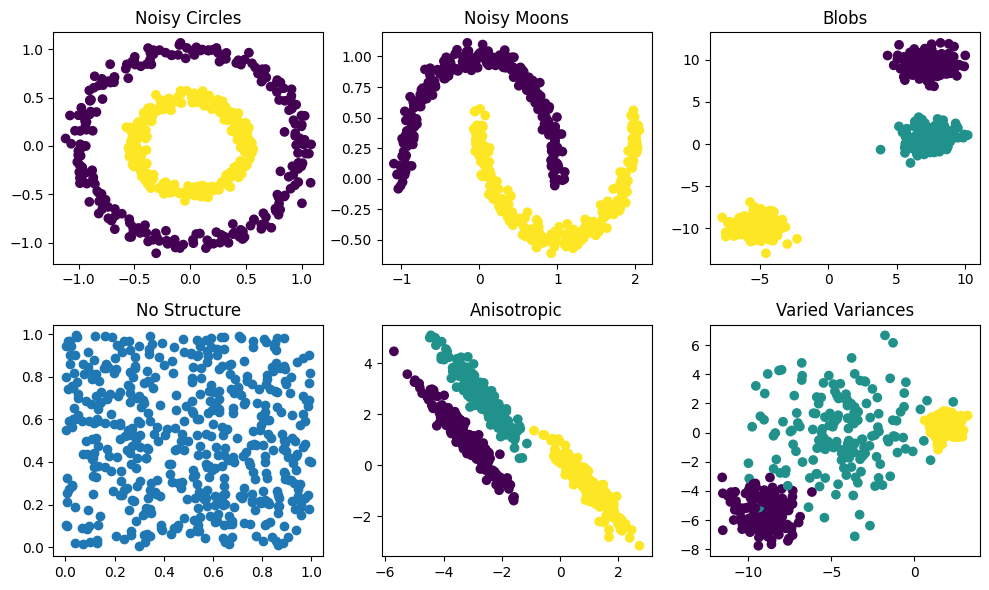

In [25]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot noisy_circles dataset
axs[0, 0].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=noisy_circles[1])
axs[0, 0].set_title("Noisy Circles")

# Plot noisy_moons dataset
axs[0, 1].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=noisy_moons[1])
axs[0, 1].set_title("Noisy Moons")

# Plot blobs dataset
axs[0, 2].scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
axs[0, 2].set_title("Blobs")

# Plot no_structure dataset
axs[1, 0].scatter(no_structure[0][:, 0], no_structure[0][:, 1])
axs[1, 0].set_title("No Structure")

# Plot aniso dataset
axs[1, 1].scatter(aniso[0][:, 0], aniso[0][:, 1], c=aniso[1])
axs[1, 1].set_title("Anisotropic")

# Plot varied dataset
axs[1, 2].scatter(varied[0][:, 0], varied[0][:, 1], c=varied[1])
axs[1, 2].set_title("Varied Variances")

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with subplots
plt.show()


This code will generate separate figures for each dataset and plot the original data as well as the results of the four clustering algorithms (K-Means, K-Medoids, DBSCAN, and Spectral Clustering) for each dataset. It can visually compare the performance of each algorithm on different types of scattered data.


*	**Noisy Circles:** This dataset consists of two intertwined circles with some noise. It's a challenging dataset for clustering algorithms because the clusters are not linearly separable.

*	**Noisy Moons:** Similar to the noisy circles dataset, this one contains two moon-shaped clusters with noise. It's also a non-linearly separable dataset.

*	**Blobs:** This dataset contains three well-defined clusters of data points. It's a relatively straightforward dataset for clustering algorithms as the clusters are spherical and well-separated.

* **No Structure:** This dataset appears as random scattered points with no discernible structure or clusters. It's essentially noise with no underlying patterns.

*	**Anisotropic Data:** The data in this dataset is distributed in an anisotropic manner, meaning the clusters are stretched along specific directions. It's another challenging dataset for clustering algorithms due to its elongated cluster shapes.

*	**Varied Variances:** This dataset contains three clusters, each with a different standard deviation, making it challenging for clustering algorithms to identify the clusters with different variances.

In [30]:
# no_structure sin el None
no_structure = np.random.rand(n_samples, 2)

# List of datasets
datasets_list = [
    ("Noisy Circles", noisy_circles),
    ("Noisy Moons", noisy_moons),
    ("Blobs", blobs),
    ("Anisotropic", aniso),
    ("No Structure", no_structure),
    ("Varied Variances", varied)
]

Dataset: Noisy Circles
K-Means - Silhouette: 0.3528226719834834
K-Medoids - Silhouette: 0.34817164002866785
DBSCAN - Silhouette: -0.09204560876576198
Spectral Clustering - Silhouette: 0.35302808729519114


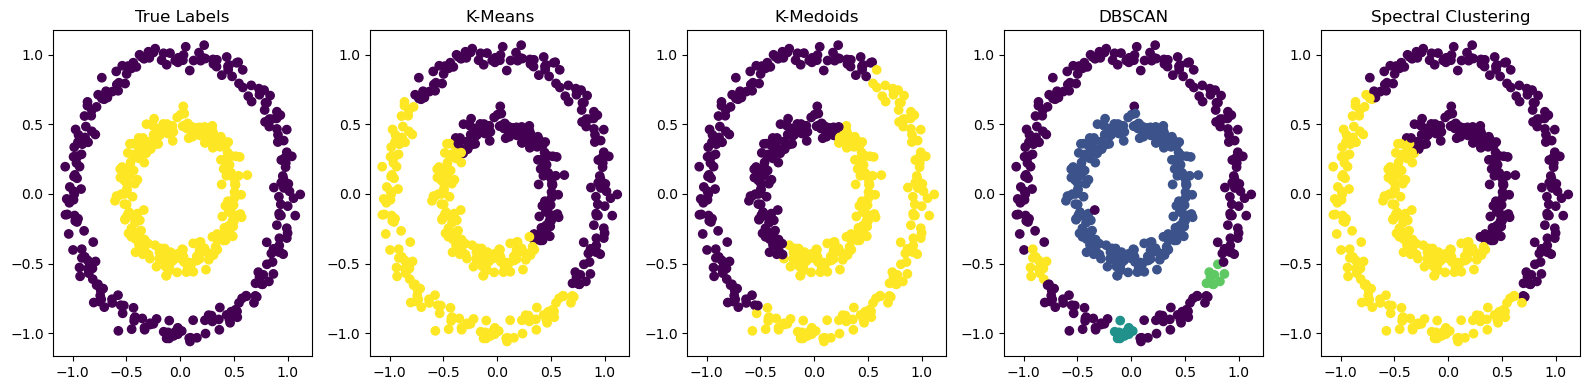

Dataset: Noisy Moons
K-Means - Silhouette: 0.49264060090391104
K-Medoids - Silhouette: 0.0037747000269349137
DBSCAN - Silhouette: -0.17039706756254694
Spectral Clustering - Silhouette: 0.0044440565754462445


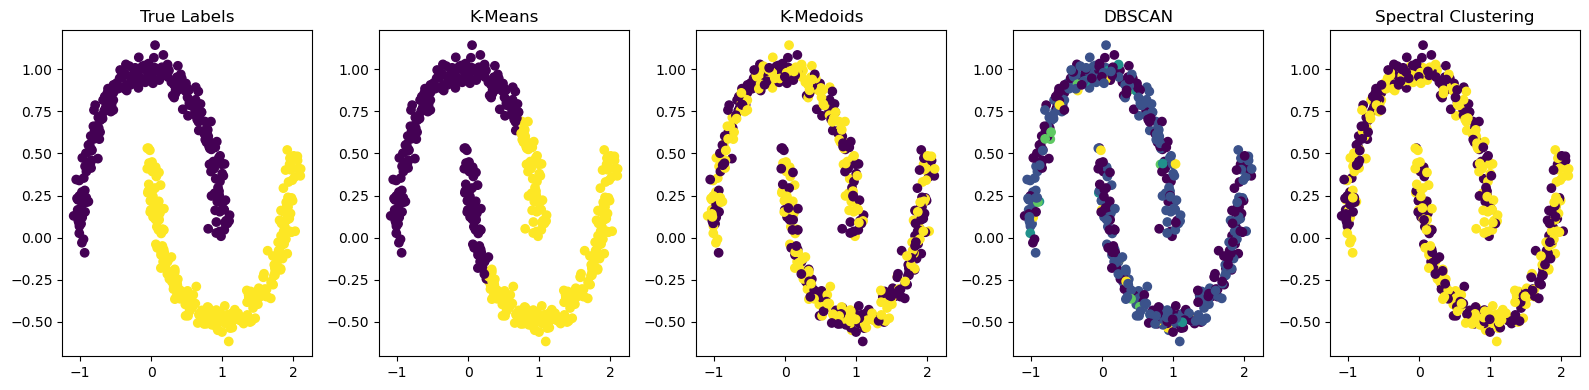

Dataset: Blobs
K-Means - Silhouette: 0.8229367222836427
K-Medoids - Silhouette: -0.0014249690010198135
DBSCAN - Silhouette: -0.2764999452354332
Spectral Clustering - Silhouette: 0.006973235660784871


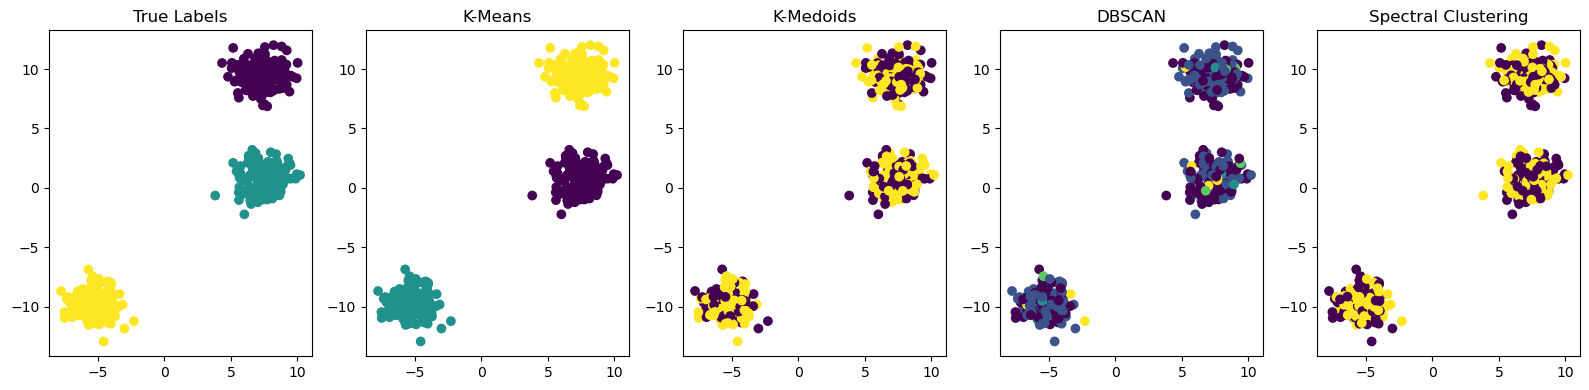

Dataset: Anisotropic
K-Means - Silhouette: 0.5009630274765694
K-Medoids - Silhouette: -0.0010113909960624407
DBSCAN - Silhouette: -0.11449242554807935
Spectral Clustering - Silhouette: -0.0019752806882300817


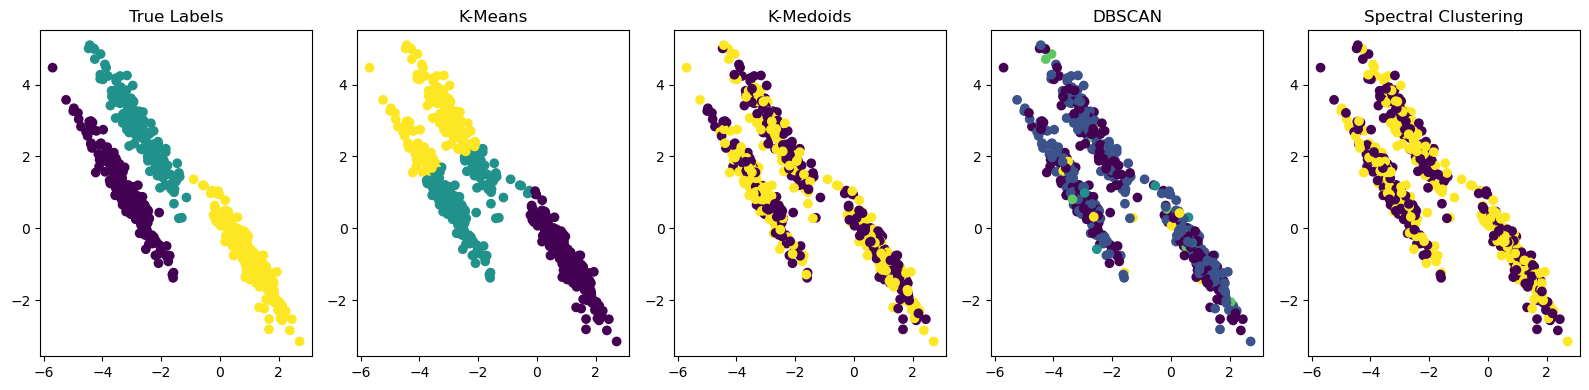

Dataset: No Structure
K-Means - Silhouette: 0.3586894383824623
K-Medoids - Silhouette: 9.967713753365803e-06
DBSCAN - Silhouette: -0.14877358523706688
Spectral Clustering - Silhouette: 0.0010376385173425878


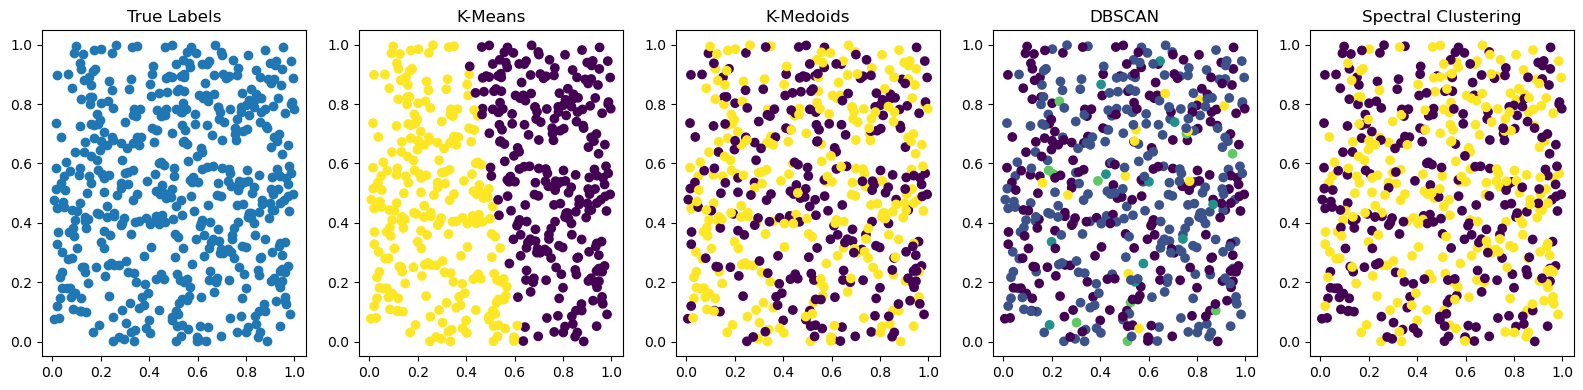

Dataset: Varied Variances
K-Means - Silhouette: 0.6548557086159974
K-Medoids - Silhouette: -0.0011313362583652738
DBSCAN - Silhouette: -0.12666677322046385
Spectral Clustering - Silhouette: -0.0015286531194780367


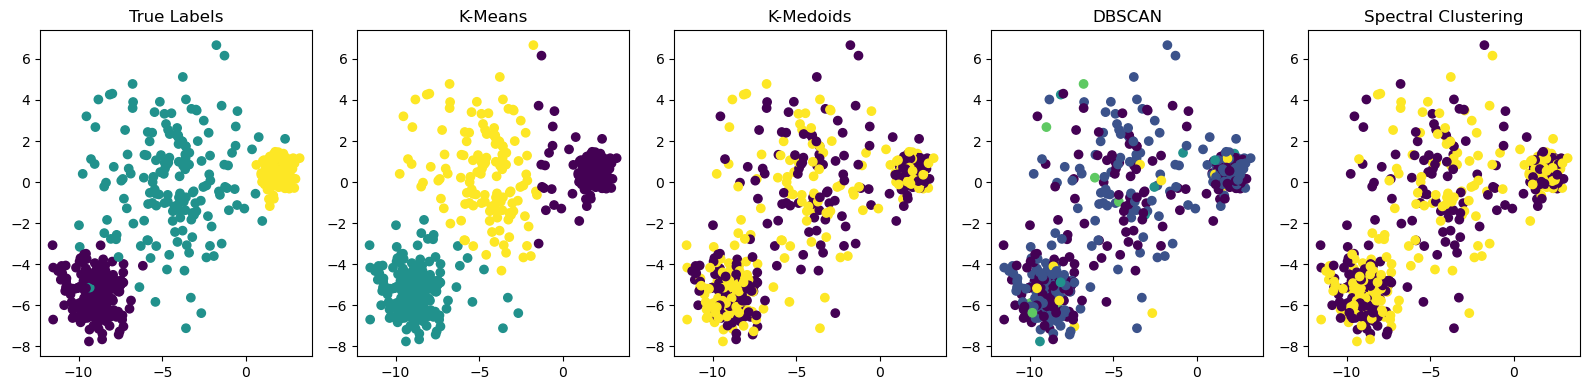

In [ ]:
# Iterate through each dataset and apply clustering algorithms
for dataset_name, dataset_data in datasets_list:

    if dataset_name == "No Structure":
        X = no_structure
        true_labels = (1,2) # dos cluster para no structure
    else:
        X, true_labels = dataset_data

    # Apply K-Means
    kmeans_labels = KMeans(n_clusters=len(np.unique(true_labels)), n_init=10).fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)

    # Apply K-Medoids
    kmedoids = KMedoids(n_clusters=len(np.unique(true_labels))).fit_predict(X)
    kmedoids_silhouette = silhouette_score(X, kmedoids_labels)

    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.1, min_samples=10).fit_predict(X)
    dbscan_silhouette = silhouette_score(X, dbscan_labels)

    # Apply Spectral Clustering
    spectral = SpectralClustering(n_clusters=len(np.unique(true_labels))).fit_predict(X)
    spectral_silhouette = silhouette_score(X, spectral_labels)

    # Print and visualize results
    print(f"Dataset: {dataset_name}")
    print(f"K-Means - Silhouette: {kmeans_silhouette}")
    print(f"K-Medoids - Silhouette: {kmedoids_silhouette}")
    print(f"DBSCAN - Silhouette: {dbscan_silhouette}")
    print(f"Spectral Clustering - Silhouette: {spectral_silhouette}")

    # Visualize the results (scatter plot for 2D datasets)
    if X.shape[1] == 2:
        plt.figure(figsize=(16, 4))
        plt.subplot(151)
        if dataset_name == "No Structure":
            plt.scatter(X[:, 0], X[:, 1])
        else:
            plt.scatter(X[:, 0], X[:, 1], c=true_labels)
        plt.title("True Labels")

        plt.subplot(152)
        plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
        plt.title("K-Means")

        plt.subplot(153)
        plt.scatter(X[:, 0], X[:, 1], c=kmedoids_labels)
        plt.title("K-Medoids")

        plt.subplot(154)
        plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
        plt.title("DBSCAN")

        plt.subplot(155)
        plt.scatter(X[:, 0], X[:, 1], c=spectral_labels)
        plt.title("Spectral Clustering")

        plt.tight_layout()
        plt.show()